# Задание 1. Bootstrap

В этом задании используйте датасет [Breast Cancer 🛠️[doc]](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) — классический датасет для задачи бинарной классификации. Обучите модели:

 - `DecisionTreeClassifier`
 - `RandomForestClassifier`
 - `LGBMClassifier`
 - `SVC`
 - `BaggingClassifier` с базовым класификатором `SVC`.

Параметры моделей можете оставить по умолчанию или задать сами.

Для каждой модели посчитайте [корреляцию Мэтьюса 📚[wiki]](https://en.wikipedia.org/wiki/Phi_coefficient) — метрику для оценки качества бинарной классификации, в частности, устойчивую к дисбалансу классов, (`sklearn.metrics.matthews_corrcoef` [🛠️[doc]](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html) для предсказанного ею класса и реального. Подробнее почитать про его пользу можно в статье:

[[article] 🎓 The advantages of the Matthews correlation coefficient (MCC) over F1 score and accuracy in binary classification evaluation](https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-019-6413-7)

С помощью bootstrap-подхода постройте 90% доверительные интервалы для качества полученных моделей. Используйте функцию `bootstrap_metric()` из лекции.

Постройте [боксплоты 🛠️[doc]](https://seaborn.pydata.org/generated/seaborn.boxplot.html) для качества полученных моделей.

Установка и импорт необходимых библиотек:

In [ ]:
!pip install -q dask[dataframe]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.6/242.6 kB 6.0 MB/s eta 0:00:00ta 0:00:01


In [ ]:
import lightgbm
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.datasets
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import matthews_corrcoef
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

Загрузка датасета:

In [ ]:
breast_cancer = sklearn.datasets.load_breast_cancer()
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
x = breast_cancer.data
y = breast_cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [ ]:
x[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [ ]:
# Your code here
DTC = DecisionTreeClassifier(random_state = 42)
DTC.fit(x_train, y_train)
dtc_pred = DTC.predict(x_test)

In [ ]:
matthews_corrcoef(y_pred=dtc_pred, y_true=y_test)

0.8963356530877563

In [ ]:
RFC = RandomForestClassifier(max_depth=None,)
RFC.fit(x_train, y_train)
rfc_pred = RFC.predict(x_test)

LGMBC = lightgbm.LGBMClassifier(n_estimators=2000,
    learning_rate=0.1,
    max_depth=-1,
    num_leaves=2**5,
    random_state=42,
    min_child_weight=13,
    n_jobs=-1,
    force_col_wise=True,
    verbose=-1,)
LGMBC.fit(X=x_train, y=y_train)
lgbmc_pred = LGMBC.predict(x_test)

svc = SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(X=x_test)

In [ ]:
BagC_SVC = BaggingClassifier(estimator=SVC())
BagC_SVC.fit(x_train, y_train)
bagc_pred = BagC_SVC.predict(x_test)

In [ ]:
def bootstrap_metric(y_true, y_pred, metric_fn, samples_cnt=1000, random_state=42):
    np.random.seed(random_state)
    b_metric = np.zeros(samples_cnt)
    for i in range(samples_cnt):
        poses = np.random.choice(y_true.shape[0], size=y_true.shape[0], replace=True)

        y_true_boot = y_true[poses]
        y_pred_boot = y_pred[poses]
        m_val = metric_fn(y_true_boot, y_pred_boot)
        b_metric[i] = m_val

    return b_metric

In [ ]:
boot_dtc = bootstrap_metric(y_test, dtc_pred, metric_fn=matthews_corrcoef)
boot_rfc = bootstrap_metric(y_test, rfc_pred, metric_fn=matthews_corrcoef)
boot_lgbmc = bootstrap_metric(y_test, lgbmc_pred, metric_fn=matthews_corrcoef)
boot_bagc = bootstrap_metric(y_test, bagc_pred, metric_fn=matthews_corrcoef)
boot_svc = bootstrap_metric(y_test, svc_pred, metric_fn=matthews_corrcoef)

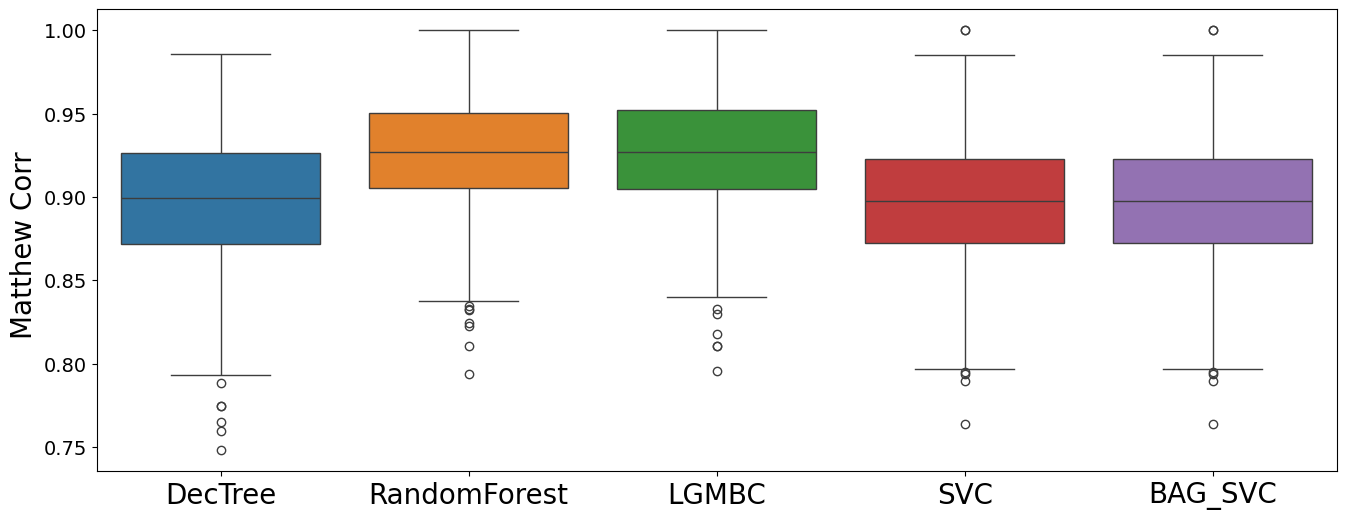

In [ ]:
import pandas as pd


plt.figure(figsize=(16, 6))
sns.boxplot(
    data=pd.DataFrame(
        {
            "DecTree": boot_dtc,
            "RandomForest": boot_rfc,
            "LGMBC": boot_lgbmc,
            "SVC" : boot_svc,
            "BAG_SVC" : boot_bagc
        }
    )
)
plt.ylabel("Matthew Corr ", size=20)
plt.tick_params(axis="both", which="major", labelsize=20)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
print('random_forest', boot_rfc.mean(), boot_rfc.std())
print('lgmbc', boot_lgbmc.mean(), boot_lgbmc.std())

random_forest 0.9249968928906641 0.03256402729794103
lgmbc 0.9254232010527652 0.03254820677355373


Сделайте вывод о том, какие модели работают лучше.

**Напишите вывод**

Лучшими моделями являются RandomForest и LGMBC. Из них чуть (на самую малость) лучше LGMBC, т.к. число выбросов у неё поменьше, если посмотреть на график (но совсем немного)

?? Как и обсуждалось на лекции, SVC & BAG_SVC показывают схожие результаты.

## Формат результата

График с демонстрацией корреляции Мэтьюса для следующих моделей:

 - `DecisionTreeClassifier`
 - `RandomForestClassifier`
 - `LGBMClassifier`
 - `SVC`
 - `BaggingClassifier` с базовым класификатором `SVC`

Пример графика:

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.3/Exercises/EX03/result_1_task_ex03.png" width="600">

# Задание 2. Дисбаланс классов

В этом задании мы рассмотрим особенности обучения и контроля качества моделей на данных, содержащих значительный дисбаланс.

Установка и импорт необходимых библиотек:

In [ ]:
!pip install -qU imbalanced-learn

In [ ]:
import imblearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import (
    train_test_split,
    KFold,
    StratifiedKFold,
    cross_validate,
)

Важно обращать внимание на сбалансированность классов в наборе.
Предположим, у нас есть некоторый набор данных со следующими метками классов:

In [ ]:
real_labels = [1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]

В наборе 16 объектов относятся к классу 0, а 5 — к классу 1.

Мы обучили две модели. Первая всегда выдает 0:

In [ ]:
model1_res = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Вторая сумела обнаружить некоторую закономерность в признаках:

In [ ]:
model2_res = [1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1]

Рассчитаем точность Accuracy (см. лекцию 1) для этих моделей:

In [ ]:
print(f"Accuracy for model1: {accuracy_score(real_labels, model1_res):.4f}")
print(f"Accuracy for model2: {accuracy_score(real_labels, model2_res):.4f}")

Accuracy for model1: 0.7619
Accuracy for model2: 0.7619


Accuracy нельзя использовать, если данные не сбалансированы. Для несбалансированных данных необходимо использовать свои метрики и модели. Одной из таких метрик является Balanced accuracy. При вычислении данной метрики считается полнота (recall) отдельно для каждого класса и вычисляется среднее значение:

In [ ]:
# Balanced accuracy for model1 = (16/16+0/5)/2 = 0.5
print(
    f"Balanced accuracy for model1: {balanced_accuracy_score(real_labels, model1_res):.3f}"
)
# Balanced accuracy for model2 = (12/16+4/5)/2 = 0.775
print(
    f"Balanced accuracy for model2: {balanced_accuracy_score(real_labels, model2_res):.3f}"
)

Balanced accuracy for model1: 0.500
Balanced accuracy for model2: 0.775


**Всегда проверяйте**, являются ли ваши данные сбалансированными и могут ли выбранные для оценки модели метрики работать с несбалансированными классами.

Загрузим датасет с различными биомаркерами пациентов с меланомой (обезличенный, информации о пациентах нет) и переменной, содержащей 1, если пациент ответил на иммунотерапию (терапия помогла пациенту и произошло уменьшение размеров опухоли), и 0, если не ответил. Количество пациентов, отвечающих на терапию, сильно меньше пациентов, которым терапия не помогает, поэтому предсказание ответа пациента на терапию на основании биомаркеров — актуальная задача в онкологии. В данном задании вам предстоит попробовать её решить.

In [ ]:
cancer = pd.read_table(
    "https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/Cancer_dataset_2.tsv",
    index_col="sample_id",
)
display(cancer.head())

# split the data on features (x) and dependant variable (y)
y = cancer["Response"]
x = cancer.drop("Response", axis=1)
print("\nNumber of patients responded to immunotherapy:")
display(y.value_counts())

IgG1/IgA      IL21     CXCL9    CXCL10      CD8A      GZMB  \
sample_id                                                                      
SAM4b0175e8db6e   3.242746  0.001280 -0.002986 -0.036366  0.096658  0.063467   
SAMd215b503f99a   2.139016 -0.000089  0.030495  0.243958  0.161128  0.565798   
SAM7fb6987514a4  12.614972  0.008103  0.502043  0.530783  0.388455  0.528142   
SAMd636e3461955   6.365973 -0.000139  0.024035  0.115127  0.084455  0.200038   
SAMc0da5d48686d   2.764089  0.006107  0.015533  0.135470  0.067686  0.053499   

                    KLRC2     KLRC3     KLRC4      GNLY       TGFB1  Response  
sample_id                                                                      
SAM4b0175e8db6e  0.502058 -0.083862  0.053659  0.091930   61.934119         0  
SAMd215b503f99a -0.203495 -0.026902 -0.035405  0.030125  103.265837         0  
SAM7fb6987514a4 -0.156209  0.001147 -0.028690  0.260703   53.552817         0  
SAMd636e3461955 -0.387373 -0.057837  0.045938  0.073192   80.837318         0  
SAMc0da5d48686d -0.116040  0.063714  0.088201  0.082940  114.422926         0


Number of patients responded to immunotherapy:


Response
0    228
1     37
Name: count, dtype: int64

В данном случае имеет место несбалансированность классов в наборе данных: пациентов, ответивших на терапию, гораздо меньше.

Есть два способа работы с несбалансированными по классам данными. Первый способ — это получение стратифицированных выборок. Необходимо иметь одинаковую долю образцов каждого класса в тренировочной и тестовой выборках, иначе возникает риск получения смещённых выборок, что приводит к некорректной оценке качества модели. Второй способ — это использование специальных алгоритмов, учитывающих несбалансированность классов.

В данном задании вам нужно продемонстрировать эффективность различных подходов  работы с несбалансированными выборками. Для этого вы будете использовать три модели, представленные ниже:

1. [[doc] 🛠️](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) `RandomForestClassifier`, библиотека sklearn
2. [[doc] 🛠️](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) `RandomForestClassifier` с балансировкой классов, библиотека sklearn — меняет стандартный вес каждого класса, равный 1, на долю класса во входных данных (см. `class_weight`).
3. [[doc] 🛠️](https://imbalanced-learn.org/stable/references/generated/imblearn.ensemble.BalancedRandomForestClassifier.html) `BalancedRandomForestClassifier`, библиотека imblearn — семплирует псевдовыборки таким образом, что в каждой псевдовыборке, которая подается на вход модели, баланс классов оказывается "выправлен".

Оцените эффективность подходов с помощью кросс-валидации, производя разбиение с учетом репрезентации классов и без него. В качестве метрики, отображающей эффективность модели, используйте значения `accuracy` и `balanced_accuracy`. Проинтерпретируйте результаты.

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True)
skf.get_n_splits(x, y)

5

In [ ]:
from sklearn.metrics import accuracy_score

Объекты, принадлежащие разным классам, распределены неравномерно. Для адекватной работы `cross_validate` нужно перемешать данные. Для этого используйте флаг `shuffle=True`, применяя `KFold` и `StratifiedKFold` (см. параметр `cv` в функции `cross_validate`).

In [ ]:
# Your code here
cv_rf_acc = cross_validate(estimator=RandomForestClassifier(n_estimators=100), X=x, y=y, cv=skf, scoring='accuracy')
cv_rf_weighted_acc = cross_validate(estimator=RandomForestClassifier(n_estimators=100, class_weight='balanced'), X=x, y=y, cv=skf, scoring='accuracy')
cv_bal_rf_acc = cross_validate(estimator=BalancedRandomForestClassifier(n_estimators=100), X=x, y=y, cv=skf, scoring='accuracy')

cv_rf_bal = cross_validate(estimator=RandomForestClassifier(n_estimators=100), X=x, y=y, cv=skf, scoring='balanced_accuracy')
cv_rf_weighted_bal = cross_validate(estimator=RandomForestClassifier(n_estimators=100, class_weight='balanced'), X=x, y=y, cv=skf, scoring='balanced_accuracy')
cv_bal_rf_bal = cross_validate(estimator=BalancedRandomForestClassifier(n_estimators=100), X=x, y=y, cv=skf, scoring='balanced_accuracy')


In [ ]:
cv_rf_acc

{'fit_time': array([0.28391361, 0.34531474, 0.30177093, 0.28197789, 0.28857279]),
 'score_time': array([0.01238203, 0.01297426, 0.0112915 , 0.01253176, 0.01142955]),
 'test_score': array([0.88679245, 0.86792453, 0.8490566 , 0.81132075, 0.8490566 ])}

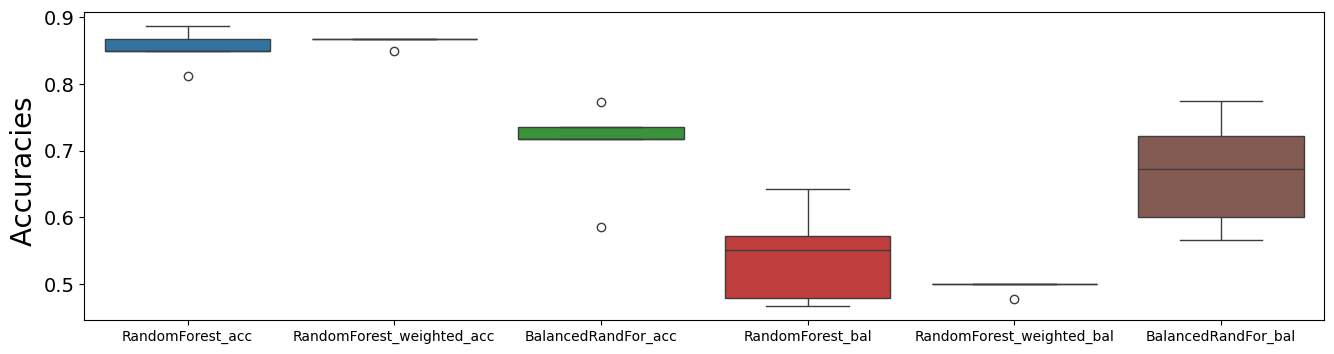

In [ ]:
import pandas as pd


plt.figure(figsize=(16, 4))
sns.boxplot(
    data=pd.DataFrame(
        {
            "RandomForest_acc": cv_rf_acc['test_score'],
            "RandomForest_weighted_acc": cv_rf_weighted_acc['test_score'],
            "BalancedRandFor_acc": cv_bal_rf_acc['test_score'],
            "RandomForest_bal": cv_rf_bal['test_score'],
            "RandomForest_weighted_bal": cv_rf_weighted_bal['test_score'],
            "BalancedRandFor_bal": cv_bal_rf_bal['test_score']
        }
    )
)
plt.ylabel("Accuracies ", size=20)
plt.tick_params(axis="both", which="major", labelsize=10)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
print('Accuracy')
print(*['RFC', 'RFC_weighted','BalRFC'] )
print(cv_rf_acc['test_score'].mean(), cv_rf_acc['test_score'].std())
print(cv_rf_weighted_acc['test_score'].mean(), cv_rf_weighted_acc['test_score'].std())
print(cv_bal_rf_acc['test_score'].mean(), cv_bal_rf_acc['test_score'].std())
print('\n')
print('Balanced Accuracy')
print(*['RFC', 'RFC_weighted','BalRFC'] )
print(cv_rf_bal['test_score'].mean(), cv_rf_bal['test_score'].std())
print(cv_rf_weighted_bal['test_score'].mean(), cv_rf_weighted_bal['test_score'].std())
print(cv_bal_rf_bal['test_score'].mean(),  cv_bal_rf_bal['test_score'].std())

Accuracy
RFC RFC_weighted BalRFC
0.8528301886792452 0.025031130493248295
0.8641509433962264 0.007547169811320753
0.7056603773584905 0.06381711141618024


Balanced Accuracy
RFC RFC_weighted BalRFC
0.5421204278812974 0.06459732294998131
0.4955555555555556 0.008888888888888878
0.667123878536922 0.07672751479997694


Какая модель лучше справляется с дисбалансом классов?

**Напишите вывод**

Первые три результата получены по accuracy (не баланс). Следующие три по balanced_accuracy.

**Лучше всего с дисбалансом классов справилась модель `BalancedRandomForest`** из imblearn.ensemble.

* Результаты

1. `RandomForestClassifier`, библиотека sklearn;
  * Accuracy Mean 0.85
  * Accuracy STD 0.02
  * Balanced Accuracy Mean 0.54
  * Balanced Accuracy STD 0.06
  
2. `RandomForestClassifier` с балансировкой классов, библиотека sklearn;
  * Accuracy Mean 0.86
  * Accuracy STD 0.007
  * Balanced Accuracy Mean 0.49
  * Balanced Accuracy STD 0.008
3. `BalancedRandomForestClassifier`, библиотека imblearn.
  * Accuracy Mean 0.70
  * Accuracy STD 0.063
  * Balanced Accuracy Mean 0.66
  * Balanced Accuracy STD 0.07



## Формат результата

Получить значения `accuracy` и `balanced_accuracy`, оцененные на кросс-валидации с учетом стратификации по классам и без, для моделей:
1. `RandomForestClassifier`, библиотека sklearn;
2. `RandomForestClassifier` с балансировкой классов, библиотека sklearn;
3. `BalancedRandomForestClassifier`, библиотека imblearn.

# Задание 3. Разные типы бустингов

В этом задании будем использовать датасет с рейтингом блюд по некоторым характеристикам.

В некоторых реализациях градиентного бустинга есть возможность использовать другой метод обучения. Например, в XGB есть тип `dart`, а в LGBM — `goss`. Это позволяет составлять более эффективные ансамбли.

Используя кросс-валидацию (используйте 3 фолда), обучите модели:
* `CatBoostRegressor`
* `XGBRegressor`
* `LGBMRegressor`

Сохраните модель на каждом фолде и посчитайте `mse` для тестовой выборки, используя модель с каждого фолда. Получите предсказания всех 9 моделей на тестовой выборке и усредните их. Затем посчитайте `mse` для усредненных предсказаний.

Напишите выводы о полученном качестве моделей.

Установка и импорт необходимых библиотек:

In [ ]:
!pip install -q catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.9 MB/s eta 0:00:00


In [ ]:
import xgboost
import catboost
import lightgbm
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split, KFold

Загрузка датасета:

In [ ]:
recipies = pd.read_csv(
    "https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/recipes.csv"
)
recipies

calories  protein   fat  sodium  cakeweek  wasteless  rating
0         426.0     30.0   7.0   559.0       0.0        0.0   2.500
1         403.0     18.0  23.0  1439.0       0.0        0.0   4.375
2         165.0      6.0   7.0   165.0       0.0        0.0   3.750
3         547.0     20.0  32.0   452.0       0.0        0.0   3.125
4         948.0     19.0  79.0  1042.0       0.0        0.0   4.375
...         ...      ...   ...     ...       ...        ...     ...
15859      28.0      2.0   2.0    64.0       0.0        0.0   3.125
15860     671.0     22.0  28.0   583.0       0.0        0.0   4.375
15861     563.0     31.0  38.0   652.0       0.0        0.0   4.375
15862     631.0     45.0  24.0   517.0       0.0        0.0   4.375
15863     560.0     73.0  10.0  3698.0       0.0        0.0   4.375

[15864 rows x 7 columns]

In [ ]:
y = recipies["rating"]
x = recipies.drop(["rating"], axis=1)

x_train_all, x_test, y_train_all, y_test = train_test_split(
    x.values, y.values, train_size=0.7, random_state=42
)

In [ ]:
from sklearn.metrics import mean_squared_error


def train_and_test_regressor(models, x_train, y_train, x_test, y_test, verb=True):
    boot_scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)  # train the model
        y_pred = model.predict(x_test)  # get predictions
        boot_scores[name] = bootstrap_metric(  # calculate bootstrap score
            y_test,
            y_pred,
            metric_fn=mean_squared_error,
        )
        if verb:
            print(f"Fitted {name} with bootstrap score {boot_scores[name].mean():.3f}")

    results = pd.DataFrame(boot_scores)

    return results


# results_rf = train_and_test_regressor(models_rf, x_train, y_train, x_test, y_test)

In [ ]:
# Your code here
models = {}
models['cat'] = catboost.CatBoostRegressor(verbose=0)
models['xgb'] = xgboost.XGBRFRegressor()
models['lgbm'] = lightgbm.LGBMRegressor()

In [ ]:
results_preds = train_and_test_regressor(models, x_train_all, y_train_all, x_test, y_test)

Fitted cat with bootstrap score 1.532
Fitted xgb with bootstrap score 1.535
Fitted lgbm with bootstrap score 1.561


In [ ]:
kfold = KFold(n_splits=3)
kfold.get_n_splits(x_train_all, y_train_all)

3

In [ ]:
results_cv = {}
for name, model in models.items():
  results_cv[name] = cross_validate(estimator=model, X=x_train_all, y=y_train_all, cv=kfold, scoring='neg_mean_squared_error')

In [ ]:
results_cv

{'cat': {'fit_time': array([7.03786325, 8.02481794, 5.47648811]),
  'score_time': array([0.02814388, 0.05217481, 0.01294518]),
  'test_score': array([-1.47398748, -1.60308341, -1.5522741 ])},
 'xgb': {'fit_time': array([0.14803743, 0.14114594, 0.14647412]),
  'score_time': array([0.00994015, 0.00969887, 0.01481056]),
  'test_score': array([-1.46576047, -1.59082778, -1.53800993])},
 'lgbm': {'fit_time': array([0.08506894, 0.08238196, 0.08508801]),
  'score_time': array([0.0242455 , 0.02546668, 0.02399921]),
  'test_score': array([-1.49344309, -1.61136957, -1.55886835])}}

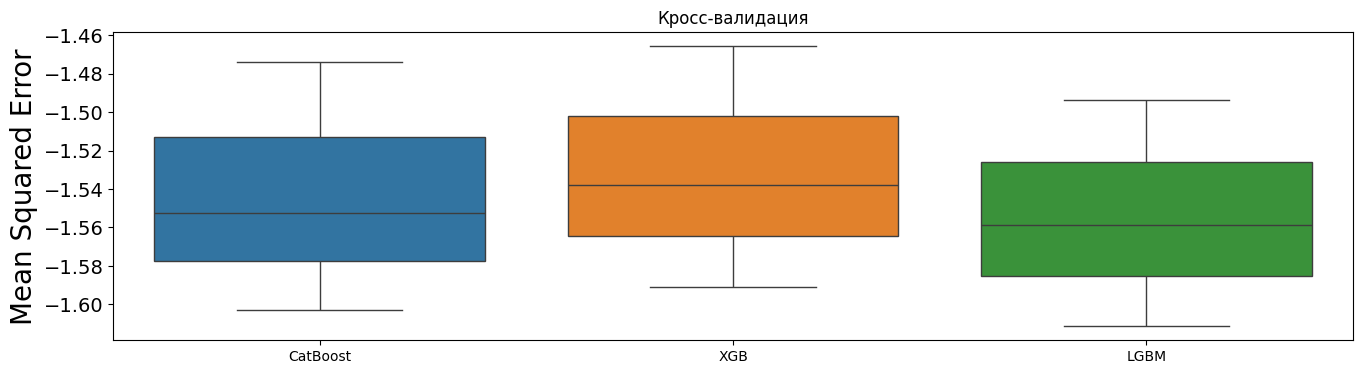

In [ ]:
plt.figure(figsize=(16, 4))
sns.boxplot(
    data=pd.DataFrame(
        {
            "CatBoost": results_cv['cat']['test_score'],
            "XGB": results_cv['xgb']['test_score'],
            "LGBM": results_cv['lgbm']['test_score'],
        }
    )
)
plt.ylabel("Mean Squared Error", size=20)
plt.tick_params(axis="both", which="major", labelsize=10)
plt.yticks(fontsize=14)
plt.title('Кросс-валидация')
plt.show()

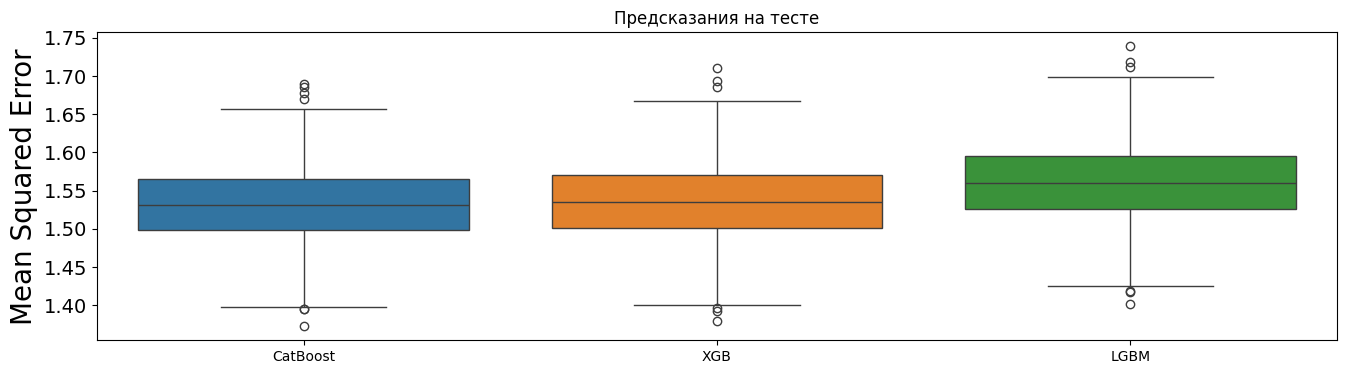

In [ ]:
plt.figure(figsize=(16, 4))
sns.boxplot(
    data=pd.DataFrame(
        {
            "CatBoost": results_preds['cat'],
            "XGB": results_preds['xgb'],
            "LGBM": results_preds['lgbm'],
        }
    )
)
plt.ylabel("Mean Squared Error", size=20)
plt.tick_params(axis="both", which="major", labelsize=10)
plt.yticks(fontsize=14)
plt.title('Предсказания на тесте')
plt.show()

In [ ]:
print(f'Cat mean: {results_preds["cat"].mean():.2f} \t std: {results_preds["cat"].std():.2f}')
print(f'XGB mean: {results_preds["xgb"].mean():.2f} \t std: {results_preds["xgb"].std():.2f}')
print(f'LGBM mean: {results_preds["lgbm"].mean():.2f} \t std: {results_preds["lgbm"].std():.2f}')

Cat mean: 1.53 	 std: 0.05
XGB mean: 1.54 	 std: 0.05
LGBM mean: 1.56 	 std: 0.05


* Результаты

На кроссвалидации лучше всего себя показал XGBoost, а за ним шёл CatBoost

При проверке на тестах лучше всего оказался CatBoost.
Стандартное отклонение у моделей идентичное, поэтому нет никаких причин не выбрать CatBoost




## Формат результата

Получить значения MSE для всех моделей и среднее значение MSE по предсказаниям всех моделей. Написать вывод.


# Задание 4. Подбор гиперпараметров

В этом задании нужно подобрать параметры для бустинга `CatBoostRegressor`, используя библиотеку `optuna`. И улучшить результат по сравнению со стандартными параметрами.

Список параметров для подбора:

* `depth`
* `iterations`
* `learning_rate`
* `colsample_bylevel`
* `subsample`
* `l2_leaf_reg`
* `min_data_in_leaf`
* `max_bin`
* `random_strength`
* `bootstrap_type`

**Важно!** *Подбирать параметры нужно на валидационной выборке*

Установка и импорт необходимых библиотек:

In [ ]:
%pip install -q catboost
%pip install -q optuna


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:
import optuna
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor
from optuna.samplers import RandomSampler
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split, KFold

Загрузка датасета:

In [ ]:
recipies = pd.read_csv(
    "https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/recipes.csv"
)

In [ ]:
y = recipies["rating"]
x = recipies.drop(["rating"], axis=1)

x_train_all, x_test, y_train_all, y_test = train_test_split(
    x.values, y.values, train_size=0.7, random_state=42
)

In [ ]:
model = CatBoostRegressor(random_seed=42)

model.fit(
    x_train_all,
    y_train_all,
    eval_set=(x_test, y_test),
    verbose=200,
    use_best_model=True,
    plot=False,
    early_stopping_rounds=100,
)

print(f"\nmse_score before tuning: {mse(y_test, model.predict(x_test)):.4f}")

Learning rate set to 0.074308
0:	learn: 1.2817437	test: 1.2774827	best: 1.2774827 (0)	total: 56.4ms	remaining: 56.3s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.242760353
bestIteration = 44

Shrink model to first 45 iterations.

mse_score before tuning: 1.5445


In [ ]:
x_train_all.shape

(11104, 6)

In [ ]:
1e-3 == 0.001

True

In [ ]:
# Your code here
from optuna.samplers import TPESampler
from sklearn.model_selection import cross_val_score, KFold

# Define function which will optimized


def objective(trial):
    # boundaries for the optimizer's
    depth = trial.suggest_int("depth", 3, 15, step=1)
    min_data_in_leaf = trial.suggest_int("min_data_in_leaf", 3, 10, step=1)
    l2_leaf_reg = trial.suggest_float("l2_leaf_reg", 2, 8, step=0.01)
    random_strength = trial.suggest_float("random_strength", 0.5, 2)
    iterations = trial.suggest_int("iterations", 100, 1500, step=50)
    learning_rate = trial.suggest_float('learning_rate', 1e-3, 5e-2)
    colsample_bylevel = trial.suggest_float('colsample_bylevel', 0.1, 1., step=0.1) #step=0.01)
    subsample = trial.suggest_float('subsample', 0.2, 1, step=0.1)
    max_bin = trial.suggest_int('max_bin', 10, 255, step=1)
    bootstrap_type = trial.suggest_categorical('bootstrap_type', choices=['Bernoulli'])
    # params = {
    # 'depth': trial.suggest_int('depth', 3, 15),
    # 'iterations': trial.suggest_int('iterations', 100, 1000),
    # 'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.3),
    # 'colsample_bylevel': trial.suggest_uniform('colsample_bylevel', 0.5, 1.0),
    # 'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
    # 'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 1, 10),
    # 'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 10),
    # 'max_bin': trial.suggest_int('max_bin', 10, 255),
    # 'random_strength': trial.suggest_uniform('random_strength', 1, 10),
    # 'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['No', 'Bernoulli', 'MVS'])
    # }


    # create new model(and all parameters) every iteration
    model = CatBoostRegressor(
        # **params,
        iterations=iterations,
        # iterations=100,
        learning_rate=learning_rate,
        depth=depth,
        min_data_in_leaf=min_data_in_leaf,
        l2_leaf_reg=l2_leaf_reg,
        random_strength=random_strength,
        colsample_bylevel=colsample_bylevel,
        subsample=subsample,
        max_bin=max_bin,
        bootstrap_type=bootstrap_type,
        random_state=42,
        verbose=0,
        early_stopping_rounds=50
    )
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    neg_mse = cross_val_score(
        model, x_train_all, y_train_all, cv=kf,
        scoring="neg_mean_squared_error"
    ).mean()
    error = -neg_mse

    return error


# Create "exploration"
study = optuna.create_study(
    direction="minimize", study_name="Optimizer", sampler=TPESampler(42)
)

study.optimize(
    objective, n_trials=20
)  # The more iterations, the higher the chances of catching the most optimal hyperparameters


[I 2024-10-24 13:58:43,344] A new study created in memory with name: Optimizer
[I 2024-10-24 14:00:24,582] Trial 0 finished with value: 1.5704353716214252 and parameters: {'depth': 14, 'min_data_in_leaf': 9, 'l2_leaf_reg': 3.77, 'random_strength': 0.5335935784999819, 'iterations': 750, 'learning_rate': 0.025431650581376246, 'colsample_bylevel': 1.0, 'subsample': 0.7, 'max_bin': 45, 'bootstrap_type': 'Bernoulli'}. Best is trial 0 with value: 1.5704353716214252.
[I 2024-10-24 14:00:26,160] Trial 1 finished with value: 1.5429485285943108 and parameters: {'depth': 3, 'min_data_in_leaf': 8, 'l2_leaf_reg': 6.82, 'random_strength': 0.7567885203094618, 'iterations': 1050, 'learning_rate': 0.01444858638462606, 'colsample_bylevel': 0.2, 'subsample': 0.2, 'max_bin': 79, 'bootstrap_type': 'Bernoulli'}. Best is trial 1 with value: 1.5429485285943108.


In [ ]:
# x_train, x_val, y_train, y_val = train_test_split(x.values, y.values, test_size=0.2, random_state=42)
from sklearn.metrics import mean


def tuner(trial):
    params = {
        'depth': trial.suggest_int('depth', 4, 10),
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.3),
        'colsample_bylevel': trial.suggest_uniform('colsample_bylevel', 0.5, 1.0),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 1, 10),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 10),
        'max_bin': trial.suggest_int('max_bin', 10, 255),
        'random_strength': trial.suggest_uniform('random_strength', 1, 10),
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['No', 'Bernoulli', 'MVS'])
    }


    model = CatBoostRegressor(verbose=0)
    model.fit(x_train_all, y_train_all, eval_set=(x_test, y_test), early_stopping_rounds=50, use_best_model=True)


    preds = model.predict(x_test)
    mse = mean_squared_error(y_test, preds)

    return mse


In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(tuner, n_trials=20)


print("best parameters: ", study.best_params)
print("best MSE: ", study.best_value)

In [ ]:
study.best_params, study.best_value

* Тестирую потихоньку тут после подбора на каждых 9 трайлах из-за трейсбеков (лучший рез-т дальше)

In [ ]:
tuned_model = CatBoostRegressor(random_seed=42, use_best_model=True, **study.best_params)

tuned_model.fit(
    x_train_all,
    y_train_all,
    eval_set=(x_test, y_test),
    verbose=200,
    early_stopping_rounds=100
)

print(f"\nmse_score after tuning: {mse(y_test, tuned_model.predict(x_test)):.4f}")

* Лучший результат (MSE = 1.5374)

* UPD. Лучший результат 1.5359 в предыдущей ячейке

In [ ]:
tuned_model = CatBoostRegressor(random_seed=42, use_best_model=True, **study.best_params)

tuned_model.fit(
    x_train_all,
    y_train_all,
    eval_set=(x_test, y_test),
    verbose=200,
    early_stopping_rounds=100
)

print(f"\nmse_score after tuning: {mse(y_test, tuned_model.predict(x_test)):.4f}")

## Формат результата

Значение `mse` с подобранными параметрами меньше, чем при стандартных параметрах.

# Задание 5. Ансамблевое обучение (дополнительно)

В данной задаче вам нужно диагностировать сердечное заболевание у людей по медицинским показателям ([Heart Disease 🛠️[doc]](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci)).

Установка и импорт необходимых библиотек:

In [ ]:
!pip install -q catboost
!pip install -q lightgbm==3.0

In [ ]:
import catboost
import lightgbm
import xgboost
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    KFold,
)
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    VotingClassifier,
)

Загрузка датасета:

In [ ]:
heart_dataset = pd.read_csv(
    "https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/heart.csv"
)

In [ ]:
x = heart_dataset.drop("target", axis=1)
y = heart_dataset["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

Обучите разнообразные классификаторы, приведенные ниже, а также ансамбль `VotingClassifier` из `sklearn.ensemble`, объединяющий эти классификаторы с помощью жесткого или мякого голосования (параметр `voting =` `"hard"` или `"soft"` соответственно). Оцените качество моделей с помощью кросс-валидации на тренировочном наборе, используя функцию `cross_val_score` и метрику `f1`.

In [ ]:
rng = np.random.RandomState(42)

dt = DecisionTreeClassifier(random_state=rng, max_depth=10, min_samples_leaf=10)
rf = RandomForestClassifier(n_estimators=50, random_state=rng)
etc = ExtraTreesClassifier(random_state=rng)
knn = KNeighborsClassifier(n_neighbors=5, weights="distance")
svc_lin = SVC(kernel="linear", probability=True, random_state=rng)
svc_rbf = SVC(kernel="rbf", probability=True, random_state=rng)
cat = catboost.CatBoostClassifier(verbose=0, random_seed=42)
lgbm = lightgbm.LGBMClassifier(random_state=42, verbose=-1)
lgbm_rf = lightgbm.LGBMClassifier(
    boosting_type="rf", subsample_freq=1, subsample=0.7, random_state=42, verbose=-1
)
xgb = xgboost.XGBClassifier(random_state=42)
xgb_rf = xgboost.XGBRFClassifier(random_state=42)
lr = LogisticRegression(solver="liblinear", max_iter=10000)
nb = GaussianNB()

# Your code here

voting_hard =
voting_soft =
# -----------


for model in [voting_hard, voting_soft]:
    scores = cross_val_score(
        model,
        x_train,
        y_train,
        cv=KFold(n_splits=3, shuffle=True, random_state=rng),
        scoring="f1",
    )
    print(f"{model.__class__.__name__}: {scores.mean():.4f}")

Вы можете заметить, что ансамбль показывает хорошее, но не лучшее качество предсказания, попробуем его улучшить. Как вы знаете, ансамбли работают лучше, когда модели, входящие в них, не скоррелированы друг с другом. Определите корреляцию предсказаний базовых моделей в ансамбле на тренировочном наборе и удалите из ансамбля те модели, чьи предсказания будут сильнее коррелировать с остальными. Можете модифицировать функцию `base_model_pair_correlation` из лекции.

In [ ]:
# Your code here

Создайте новый ансамбль на исправленном наборе моделей и оцените его качество с помощью кросс-валидации на тренировочном наборе, используя функцию `cross_val_score` и метрику `f1`.

In [ ]:
# Your code here

voting_hard_2 =
voting_soft_2 =
# ------------

for model in [voting_hard_2, voting_soft_2]:
    scores = cross_val_score(
        model,
        x_train,
        y_train,
        cv=KFold(n_splits=3, shuffle=True, random_state=rng),
        scoring="f1",
    )
    print(f"{model.__class__.__name__}: {scores.mean():.4f}")

Обучите все получившиеся модели на тренировочном наборе и испытайте их качество на тестовом наборе. Получилось ли у улучшенных версий ансамблевого классификатора превзойти базовые модели, входящие в него, и свои предыдущие версии?

In [ ]:
# Your code here

Какие ансамбли работают лучше? Всегда ли больше моделей значит лучше?

**Напишите вывод**

## Формат результата

Получить значения качества для ансамблей и моделей.